In [52]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [53]:
import pandas as pd
mall_customers = pd.read_csv('Mall_Customers.csv')
print(mall_customers.head())
print(mall_customers.shape)
print(mall_customers.describe())
print(mall_customers.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0000

Handling missing values:

In [54]:
missing_values = mall_customers.isnull().sum()
missing_values[missing_values > 0]

,0


Convert 'Gender' column to numeric:

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mall_customers['Gender'] = label_encoder.fit_transform(mall_customers['Gender'])

#value_counts() was used to check the distribution of gender values after encoding, and to prepare the data for visualization.

In [56]:
gender_counts = mall_customers['Gender'].value_counts()
print(gender_counts)

Gender
0    112
1     88
Name: count, dtype: int64


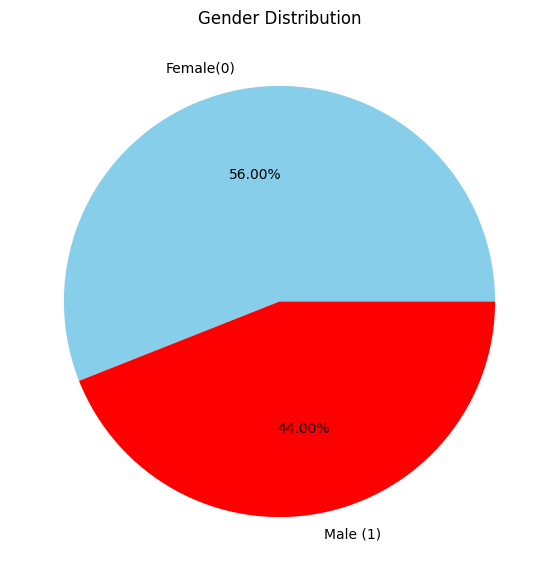

In [57]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=['Female(0)', 'Male (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'])
plt.title('Gender Distribution')
plt.show()

In [58]:
mall_customers= mall_customers.drop(columns=['CustomerID','Gender'],axis=1)

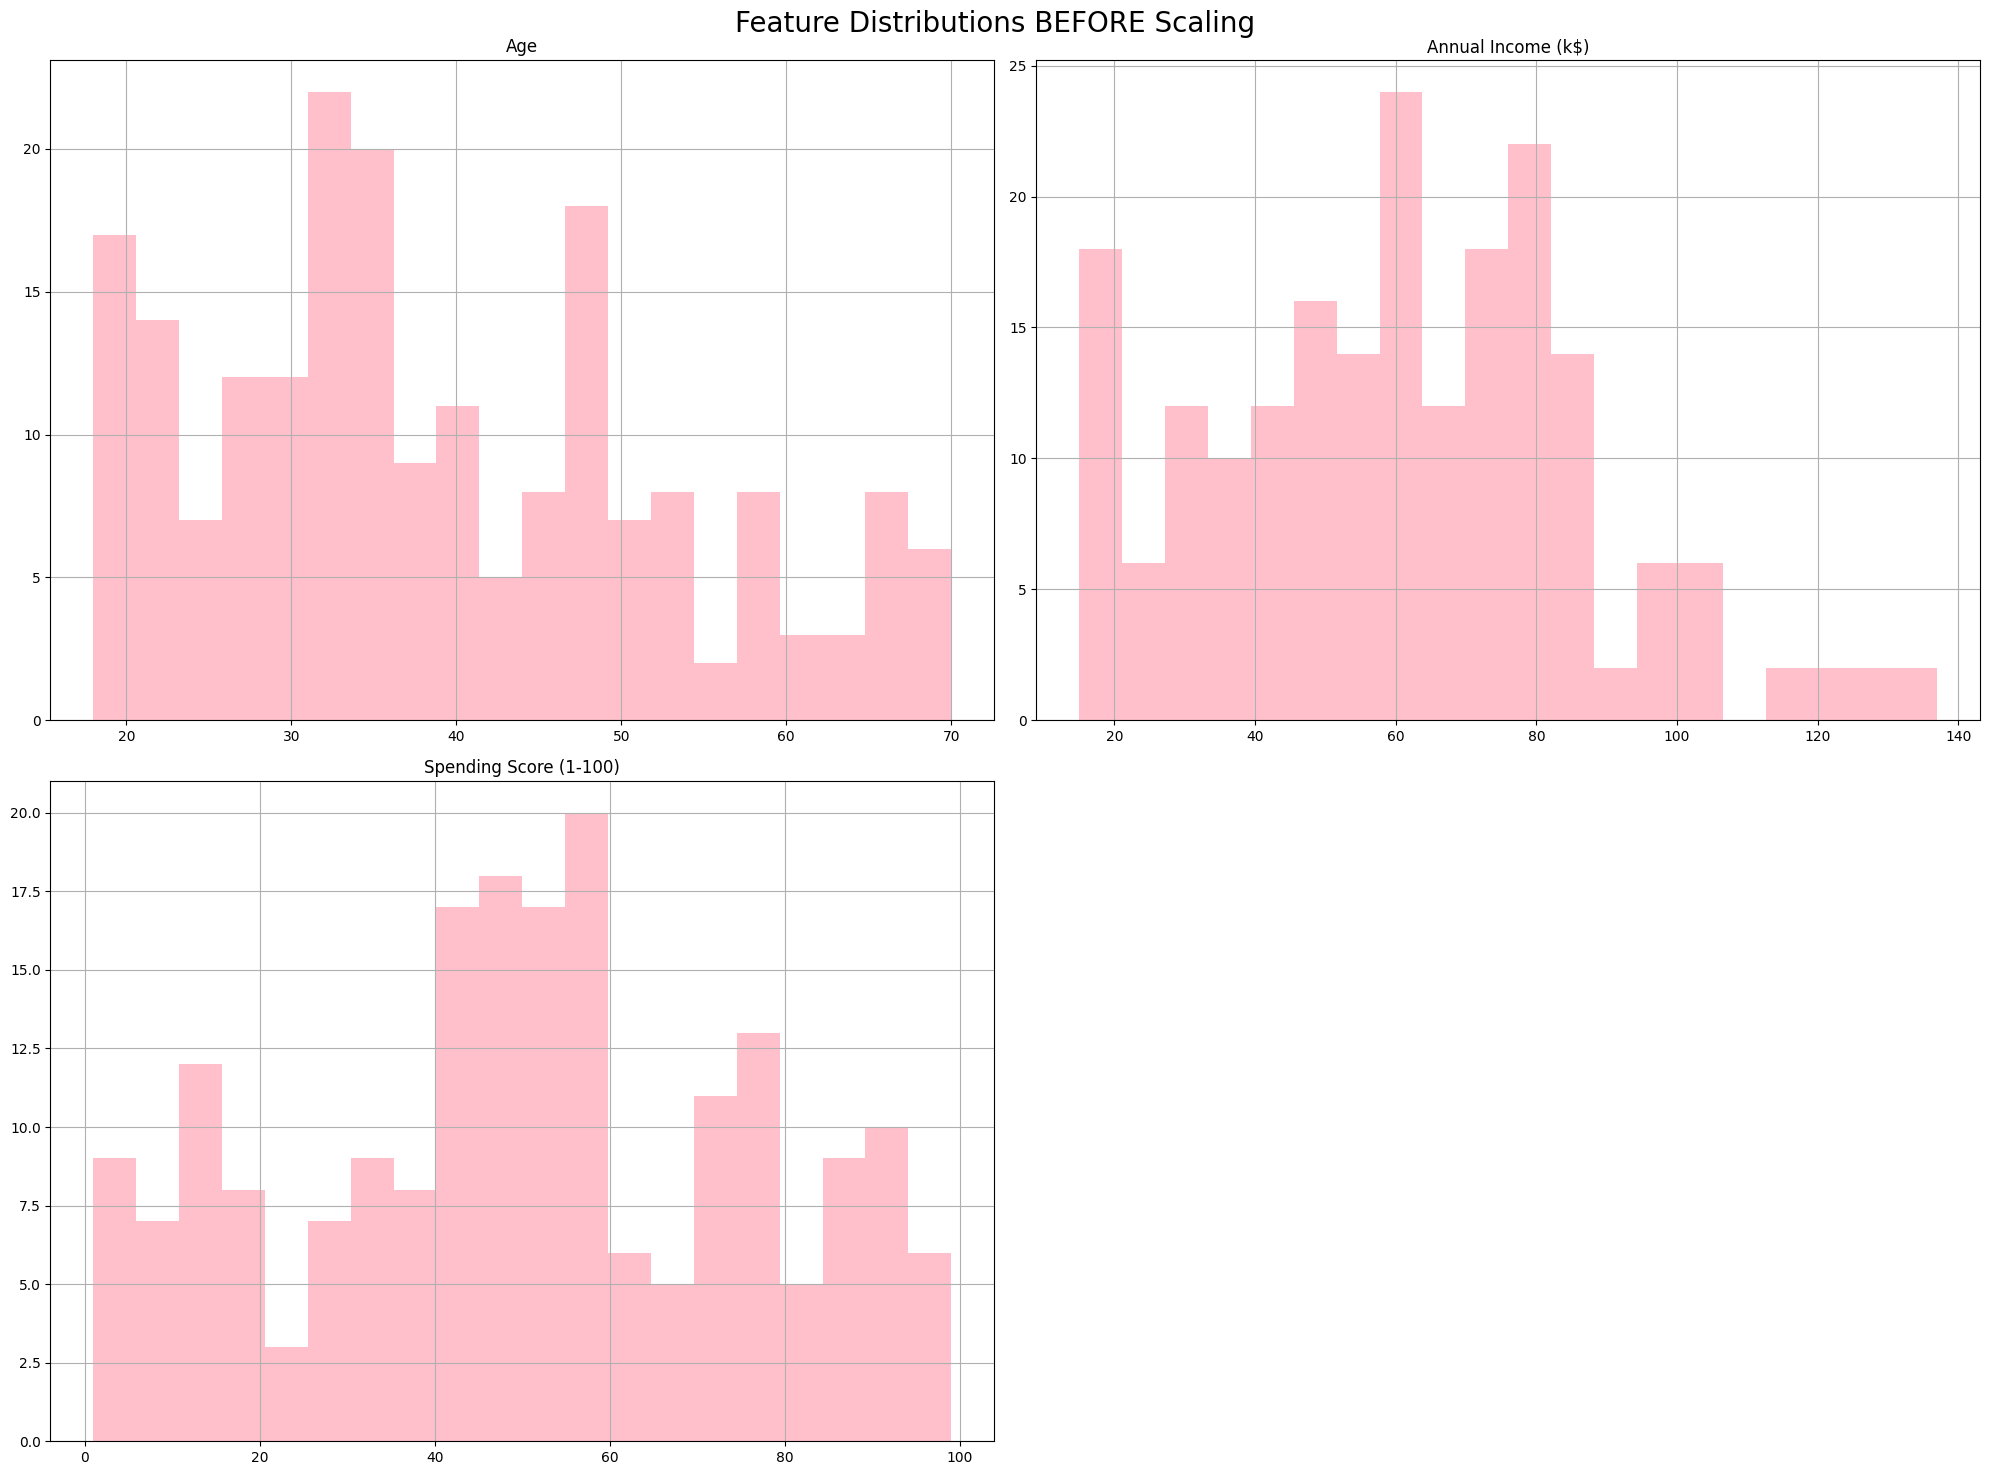

In [59]:
mall_customers.hist(bins=20, figsize=(20, 15), color='pink')
plt.suptitle("Feature Distributions BEFORE Scaling", fontsize=20)
plt.tight_layout()
plt.show()

standardScaler was applied to scale the data,to making it ready

Ploting before scaling


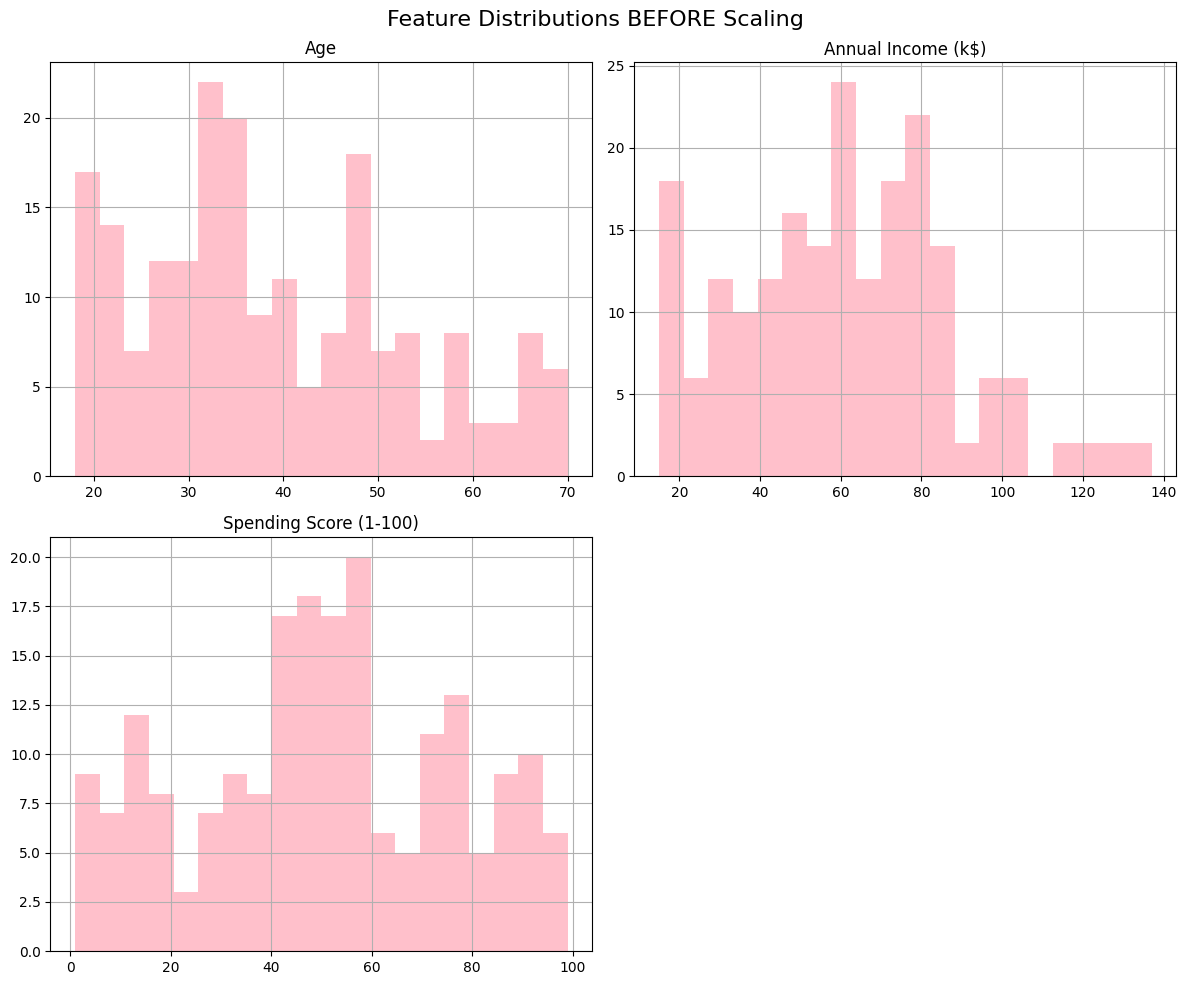

In [60]:

mall_customers.hist(bins=20, figsize=(12, 10), color='pink')
plt.suptitle("Feature Distributions BEFORE Scaling", fontsize=16)
plt.tight_layout()
plt.show()


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mall_customers_scaled = scaler.fit_transform(mall_customers)
print(mall_customers_scaled)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

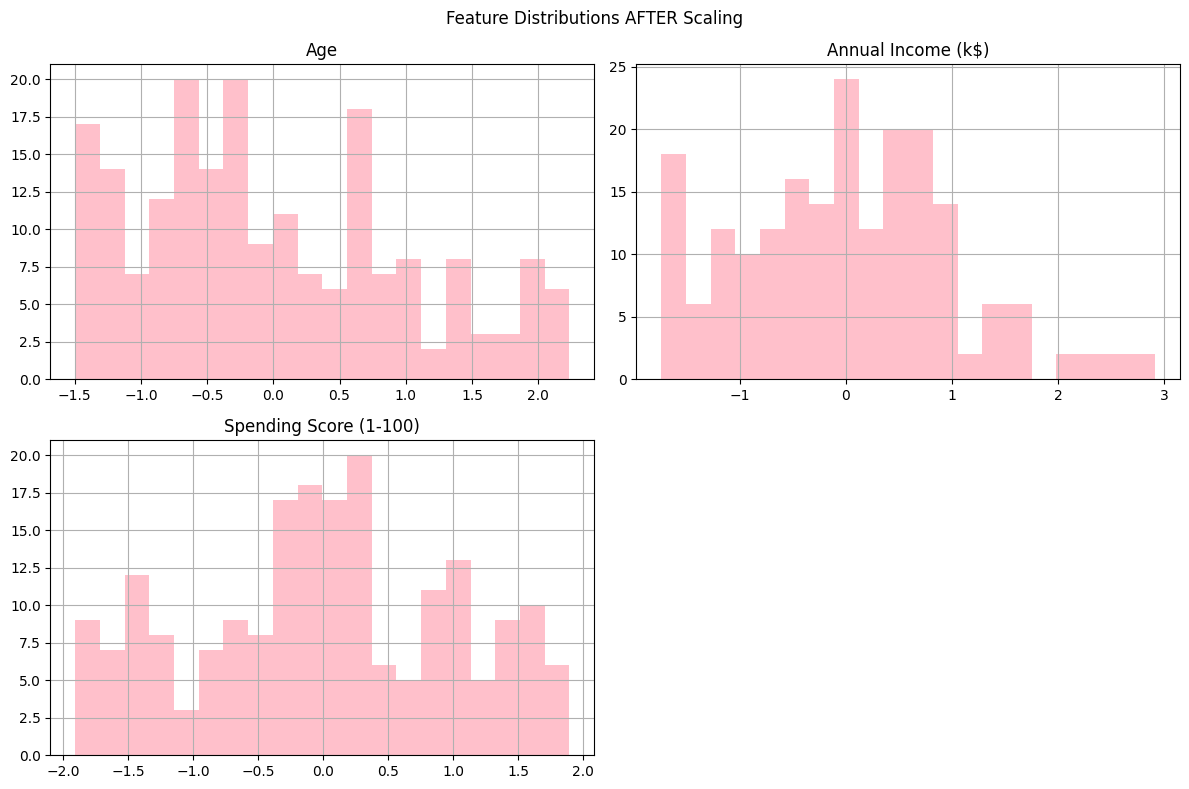

In [62]:
mall_customers_scaled_df = pd.DataFrame(mall_customers_scaled, columns=mall_customers.columns)
mall_customers_scaled_df.hist(bins=20, figsize=(12,8), color='pink')
plt.suptitle("Feature Distributions AFTER Scaling")
plt.tight_layout()
plt.show()

#2. Dimensionality Reduction

Aply PCA:

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
mall_customers_pca = pca.fit_transform(mall_customers_scaled)
print(mall_customers_pca)
print(mall_customers_pca.shape)

[[-6.15720019e-01 -1.76348088e+00 -1.32423216e+00]
 [-1.66579271e+00 -1.82074695e+00 -6.99522397e-02]
 [ 3.37861909e-01 -1.67479894e+00 -2.17902515e+00]
 [-1.45657325e+00 -1.77242992e+00 -7.80291311e-02]
 [-3.84652078e-02 -1.66274012e+00 -6.87342188e-01]
 [-1.48168526e+00 -1.73500173e+00 -1.56022687e-01]
 [ 1.09461665e+00 -1.56610230e+00 -1.41732448e+00]
 [-1.92630736e+00 -1.72111049e+00  3.88982252e-01]
 [ 2.64517786e+00 -1.46084721e+00 -2.76348759e-02]
 [-9.70130513e-01 -1.63558108e+00  1.40621897e-01]
 [ 2.49568861e+00 -1.47048914e+00  4.26540046e-01]
 [-1.45688256e+00 -1.66436050e+00  1.13545426e+00]
 [ 2.01018729e+00 -1.45329897e+00 -2.58006040e-03]
 [-1.41321072e+00 -1.61776746e+00 -2.64524163e-02]
 [ 1.00042965e+00 -1.49579176e+00 -1.12327814e+00]
 [-1.56943170e+00 -1.62502669e+00 -7.30635263e-02]
 [ 2.94060318e-01 -1.49425585e+00 -6.20742845e-01]
 [-1.31624924e+00 -1.57216383e+00 -5.31173876e-01]
 [ 1.31669910e+00 -1.37243404e+00  7.77808625e-02]
 [-1.43679899e+00 -1.51039469e+

o Analyze explained variance.



Explained Variance Ratio for each component:
Principal Component 1: 0.4427
Principal Component 2: 0.3331
Principal Component 3: 0.2243

Cumulative Explained Variance:
Principal Component 1: 0.4427
Principal Component 2: 0.7757
Principal Component 3: 1.0000


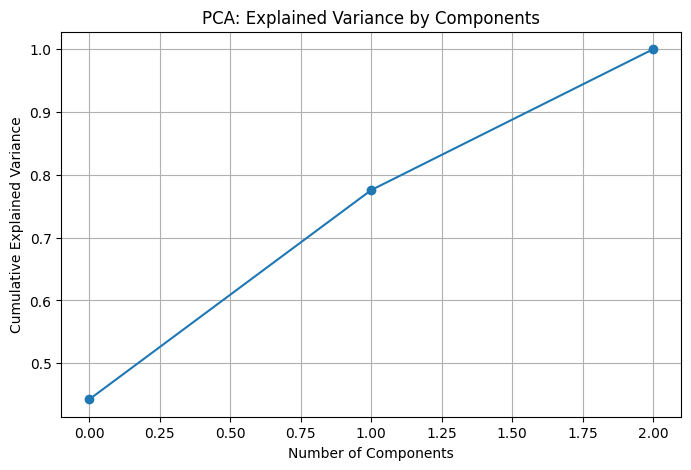

In [64]:
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {variance:.4f}")

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:")
for i, cum_variance in enumerate(cumulative_variance):
    print(f"Principal Component {i + 1}: {cum_variance:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance by Components')
plt.grid(True)
plt.show()

Choose the minimum number of components preserving 90–95% variance:

In [65]:
mall_customers_pca_90 = np.argmax(cumulative_variance >= 0.90) + 1
mall_customers_pca_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of PCA components to retain 90% variance: {mall_customers_pca_90}")
print(f"Number of PCA components to retain 95% variance: {mall_customers_pca_95}")

Number of PCA components to retain 90% variance: 3
Number of PCA components to retain 95% variance: 3


o Visualize reduced space (2D scatter plots).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
<ipython-input-85-f7914b8e8d90>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mall_customers_pca [:, 0],mall_customers_pca[:, 1],cmap='coolwarm', edgecolor='k', s=50)


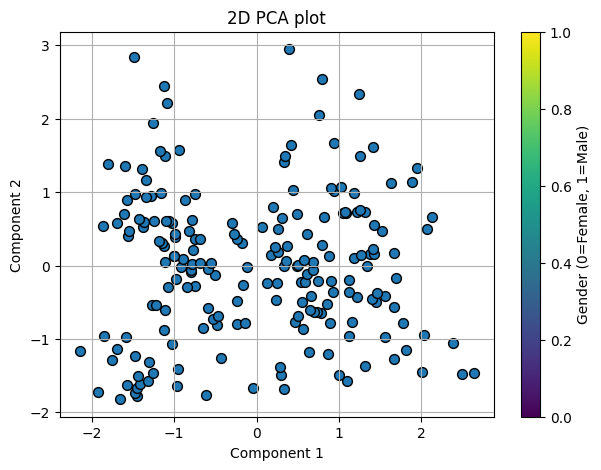

In [85]:
import matplotlib.pyplot as plt
pca_2d = pca.transform(mall_customers)
plt.figure(figsize=(7, 5))
plt.scatter(mall_customers_pca [:, 0],mall_customers_pca[:, 1],cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA plot')
plt.colorbar(label='Gender (0=Female, 1=Male)')
plt.grid(True)
plt.show()


# • Apply t-SNE for visualization:

In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 42)
mall_customers_tsne = tsne.fit_transform  (mall_customers_pca)

visualization before and after clustering

<ipython-input-68-d89cb4d6ed4d>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mall_customers_tsne[:,0], mall_customers_tsne[:,1],cmap='cool', edgecolor='k', s=30)


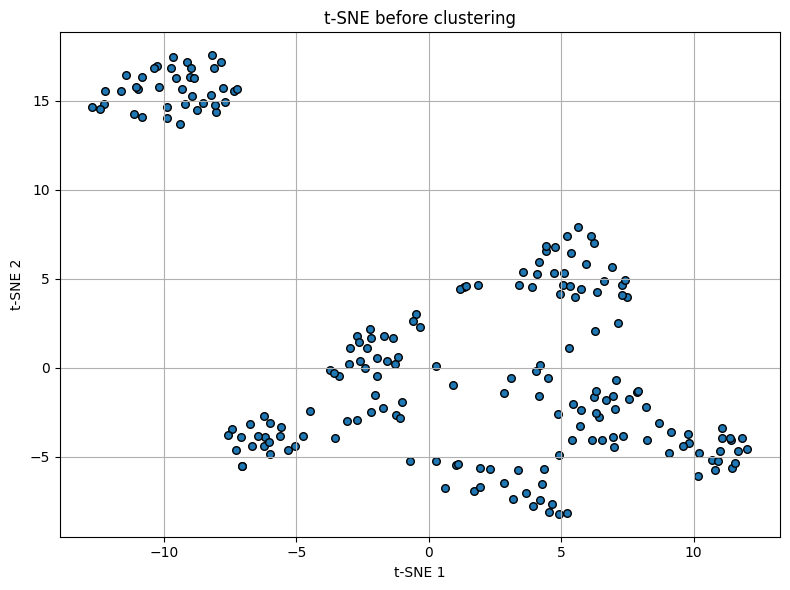

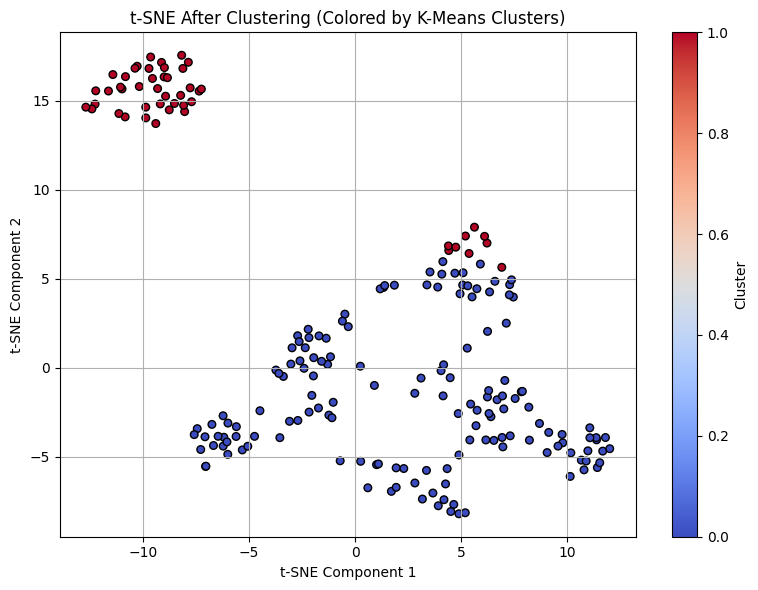

In [68]:
from sklearn.cluster import KMeans
tsne = TSNE(n_components=2)
mall_customers_tsne = tsne.fit_transform(mall_customers_scaled)

plt.figure(figsize=(8,6))
plt.scatter(mall_customers_tsne[:,0], mall_customers_tsne[:,1],cmap='cool', edgecolor='k', s=30)
plt.xlabel('t-SNE Component 1')
plt.title("t-SNE before clustering")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(mall_customers)
plt.figure(figsize=(8,6))
plt.scatter(mall_customers_tsne[:, 0],mall_customers_tsne[:, 1], c=clusters, cmap='coolwarm', edgecolor='k', s=30)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE After Clustering (Colored by K-Means Clusters)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()



# 2. Clustering Analysis




• K-Means Clustering:

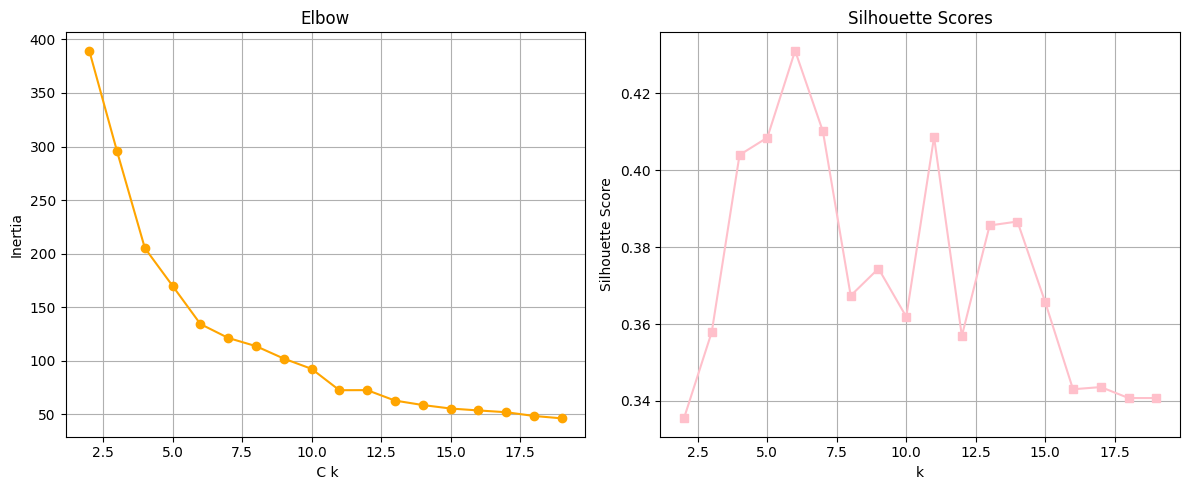

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(mall_customers_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(mall_customers_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o',color='orange')
plt.title("Elbow")
plt.xlabel(" C k")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='s', color='pink')
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

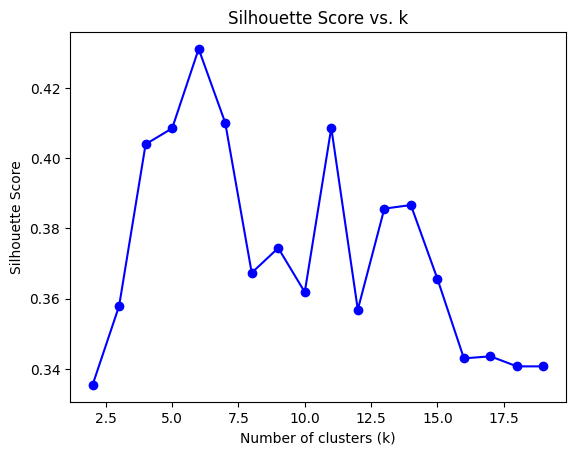

In [70]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in k_values:
 kmeans = KMeans(n_clusters=k, random_state=42)
 labels = kmeans.fit_predict(mall_customers_pca)
 silhouette_scores.append(silhouette_score(mall_customers_pca, labels))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.show()

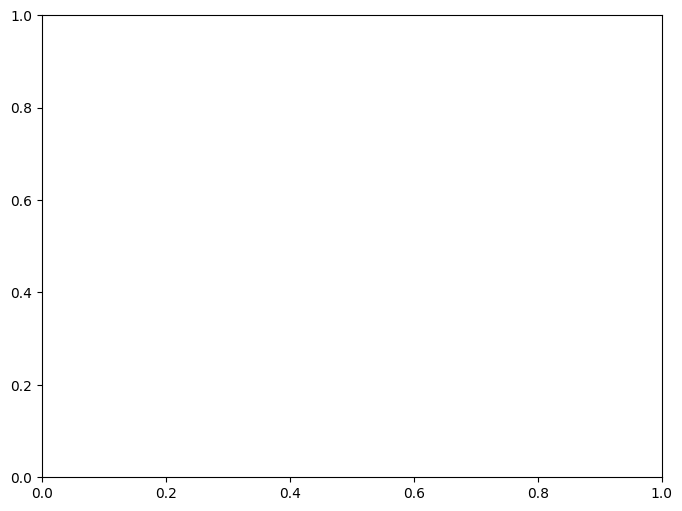

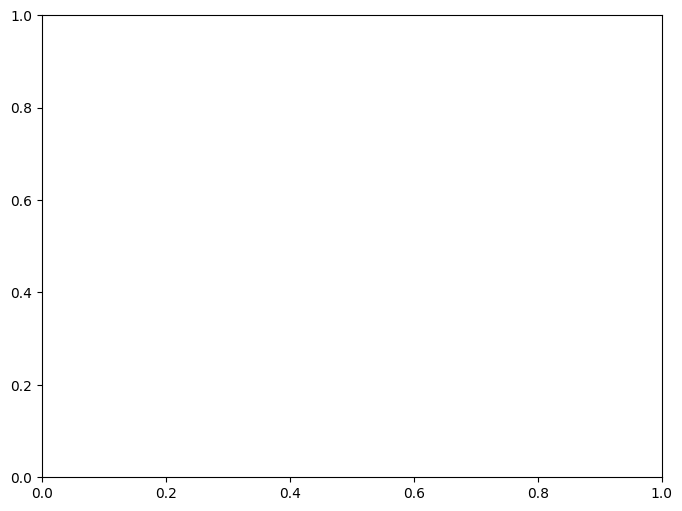

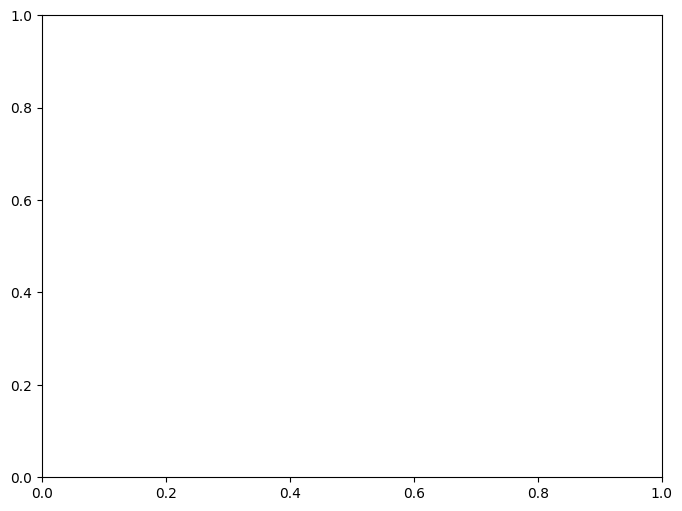

In [71]:
for k in [3, 5, 7]:
  fig, ax = plt.subplots(figsize=(8, 6))


• K-Means++ Initialization:

Text(5, 104416.151455562, 'Elbow at k=5')

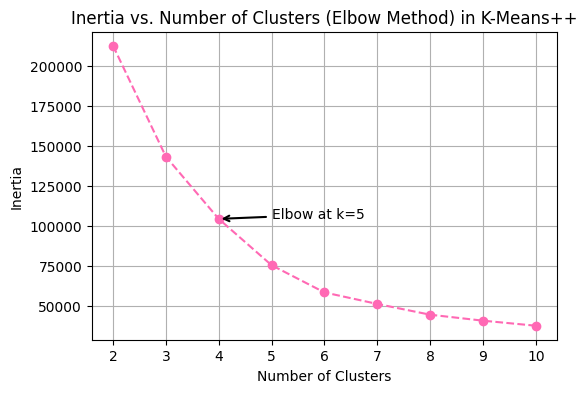

In [95]:
# Inertia comparison K-Means++
inertia_values = []
cluster_range = range(2, 11)
for k in cluster_range:
    KMP = KMeans(n_clusters=k, init='k-means++', random_state=7, n_init=10)
    KMP.fit(mall_customers)
    inertia_values.append(KMP.inertia_)

# Plot inertia vs number of clusters
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='#FF69B4')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs. Number of Clusters (Elbow Method) in K-Means++")
plt.grid()

k=5
plt.annotate( 'Elbow at k=5',
    xy=(4, inertia_values[2]),
    xytext=(5, inertia_values[2] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),
)



